In [1]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor
import matplotlib.pyplot as plt
import plotly.graph_objects as go

/Users/ilyaasvesper/Documents/GitHub/time-series-forecasting-cluserting/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
data = pd.read_parquet("/Users/ilyaasvesper/Documents/GitHub/time-series-forecasting-cluserting/Grouping/cluster0/COST.parquet")
data.head(3)


Close      Open      High       Low    Volume
item_id timestamp                                                   
COST    2022-04-18  0.220581  0.237140  0.218449  0.239653  0.331582
        2022-04-25  0.163535  0.215441  0.159539  0.179183  0.399672
        2022-05-02  0.124238  0.161858  0.124207  0.135212  0.555817

In [26]:
data = pd.read_parquet("/Users/ilyaasvesper/Documents/GitHub/time-series-forecasting-cluserting/Grouping/cluster0/COST.parquet")
ts_df = TimeSeriesDataFrame.from_data_frame(data, id_column="item_id", timestamp_column="Date")
ts_df

Close      Open      High       Low    Volume
item_id timestamp                                                   
COST    2022-04-18  0.220581  0.237140  0.218449  0.239653  0.331582
        2022-04-25  0.163535  0.215441  0.159539  0.179183  0.399672
        2022-05-02  0.124238  0.161858  0.124207  0.135212  0.555817
        2022-05-09  0.115534  0.109751  0.070275  0.107294  0.469838
        2022-05-16  0.000000  0.109809  0.050606  0.000000  1.000000
...                      ...       ...       ...       ...       ...
        2025-02-10  1.000000  0.974154  1.000000  1.000000  0.197130
        2025-02-17  0.945204  1.000000  0.988565  0.967481  0.136310
        2025-02-24  0.965414  0.938923  0.969413  0.958558  0.289186
        2025-03-03  0.839957  0.973764  0.980658  0.842561  0.519008
        2025-03-10  0.726822  0.829187  0.812477  0.749184  0.481153

[152 rows x 5 columns]

In [28]:
prediction_length = 26
train_data, test_data = ts_df.train_test_split(prediction_length)

In [29]:
train_data

Close      Open      High       Low    Volume
item_id timestamp                                                   
COST    2022-04-18  0.220581  0.237140  0.218449  0.239653  0.331582
        2022-04-25  0.163535  0.215441  0.159539  0.179183  0.399672
        2022-05-02  0.124238  0.161858  0.124207  0.135212  0.555817
        2022-05-09  0.115534  0.109751  0.070275  0.107294  0.469838
        2022-05-16  0.000000  0.109809  0.050606  0.000000  1.000000
...                      ...       ...       ...       ...       ...
        2024-08-12  0.697333  0.678554  0.683631  0.701548  0.173898
        2024-08-19  0.710130  0.698539  0.700654  0.726350  0.105430
        2024-08-26  0.729683  0.717386  0.744530  0.745735  0.230204
        2024-09-02  0.706374  0.737626  0.709757  0.726350  0.137591
        2024-09-09  0.764749  0.719738  0.752261  0.740303  0.188459

[126 rows x 5 columns]

In [30]:
test_data 

Close      Open      High       Low    Volume
item_id timestamp                                                   
COST    2022-04-18  0.220581  0.237140  0.218449  0.239653  0.331582
        2022-04-25  0.163535  0.215441  0.159539  0.179183  0.399672
        2022-05-02  0.124238  0.161858  0.124207  0.135212  0.555817
        2022-05-09  0.115534  0.109751  0.070275  0.107294  0.469838
        2022-05-16  0.000000  0.109809  0.050606  0.000000  1.000000
...                      ...       ...       ...       ...       ...
        2025-02-10  1.000000  0.974154  1.000000  1.000000  0.197130
        2025-02-17  0.945204  1.000000  0.988565  0.967481  0.136310
        2025-02-24  0.965414  0.938923  0.969413  0.958558  0.289186
        2025-03-03  0.839957  0.973764  0.980658  0.842561  0.519008
        2025-03-10  0.726822  0.829187  0.812477  0.749184  0.481153

[152 rows x 5 columns]

In [37]:
predictor = TimeSeriesPredictor(prediction_length=prediction_length, target="Close", freq="W-MON").fit(
    train_data, presets="bolt_small")

Beginning AutoGluon training...
AutoGluon will save models to '/Users/ilyaasvesper/Documents/GitHub/time-series-forecasting-cluserting/notebooks/model_training/AutogluonModels/ag-20250314_145110'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:23 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T8122
CPU Count:          8
GPU Count:          0
Memory Avail:       3.99 GB / 16.00 GB (25.0%)
Disk Space Avail:   722.87 GB / 926.35 GB (78.0%)
Setting presets to: bolt_small

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'freq': 'W-MON',
 'hyperparameters': {'Chronos': {'model_path': 'bolt_small'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 26,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'ref

In [38]:
predictions = predictor.predict(train_data)


Model not specified in predict, will default to the model with the best validation score: Chronos[bolt_small]


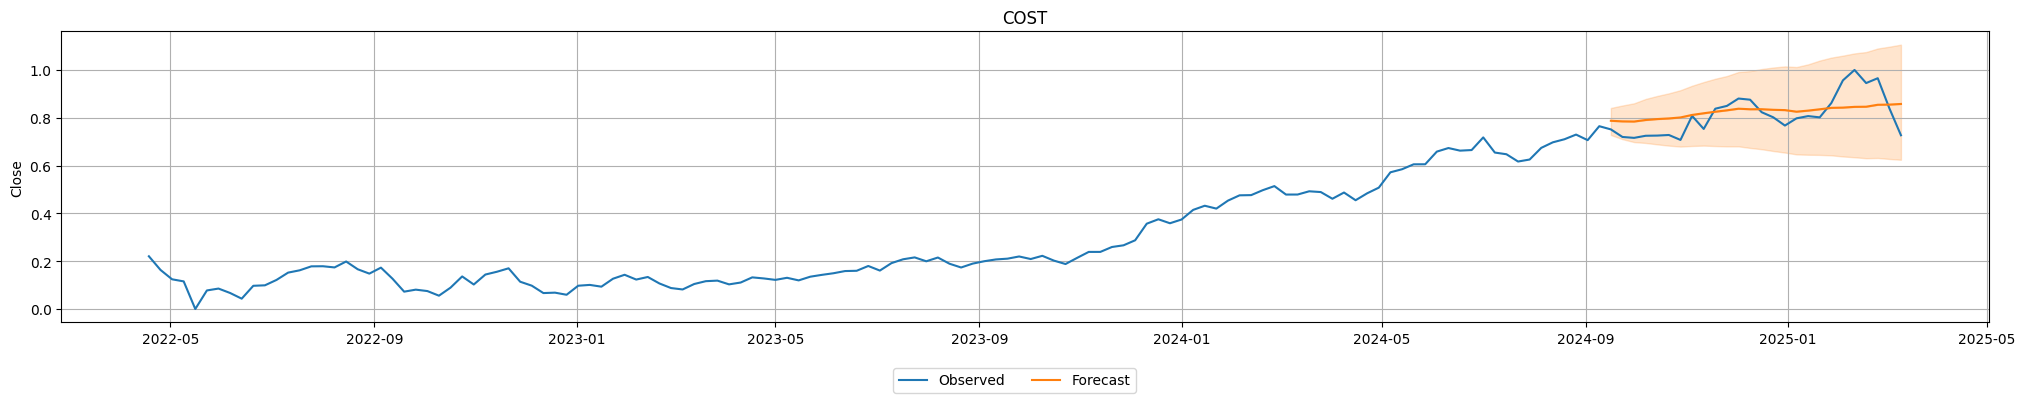

In [42]:
predictor.plot(
    data=test_data,
    predictions=predictions,
    max_history_length=200,
)

In [44]:
predictor = TimeSeriesPredictor(
    prediction_length=26,  # Forecast horizon
    eval_metric="MAPE",
    target="Close"    # Evaluation metric
).fit(
    train_data,       # Your training data (single time series)
    hyperparameters={
        "Chronos": [
            # Zero-shot configuration
            {"model_path": "bolt_small", "ag_args": {"name_suffix": "ZeroShot"}},

            # Fine-tuning configuration
            {
                "model_path": "bolt_small",
                "fine_tune": True,                    # Enable fine-tuning
                "fine_tune_lr": 5e-5,                 # Adjusted learning rate
                "fine_tune_steps": 2000,              # Increase fine-tuning steps
                "fine_tune_batch_size": 16,           # Smaller batch size for stability
                "fine_tune_shuffle_buffer_size": 100, # Reduced shuffle buffer for single time series
                "eval_during_fine_tune": True,        # Validate during fine-tuning
                "fine_tune_eval_max_items": None,     # Use all validation data
                "context_length": None,                # Double the prediction length for context
                "ag_args": {"name_suffix": "FineTuned"},
            },
        ]
    },
    enable_ensemble=True,  # Disable ensemble for simplicity during fine-tuning
    time_limit=None,        # Limit to 1 hour
)


Beginning AutoGluon training...
AutoGluon will save models to '/Users/ilyaasvesper/Documents/GitHub/time-series-forecasting-cluserting/notebooks/model_training/AutogluonModels/ag-20250314_145653'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:23 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T8122
CPU Count:          8
GPU Count:          0
Memory Avail:       5.02 GB / 16.00 GB (31.4%)
Disk Space Avail:   722.86 GB / 926.35 GB (78.0%)

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MAPE,
 'hyperparameters': {'Chronos': [{'ag_args': {'name_suffix': 'ZeroShot'},
                                  'model_path': 'bolt_small'},
                                 {'ag_args': {'name_suffix': 'FineTuned'},
                                  'context_length': None,
                                  'eval_dur

In [45]:
predictor.leaderboard(test_data)

Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,ChronosZeroShot[bolt_small],-0.070400,-0.148655,0.681469,1.082406,0.011638,1
1,WeightedEnsemble,-0.116999,-0.057844,0.896953,1.104785,0.073686,3
2,ChronosFineTuned[bolt_small],-0.292539,-0.184361,0.214855,0.022379,281.185163,2


### one whole cluster


In [67]:
import os
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame

def load_and_combine_tsdfs_from_parquet(
    folder_path,
    id_column="item_id",
    timestamp_column="Date",
    target_column="Close"
):
    """
    Reads all .parquet files in `folder_path`, each containing data that can form a
    TimeSeriesDataFrame, and combines them into a single TimeSeriesDataFrame.

    :param folder_path: Path to the directory containing one or more Parquet files.
    :param id_column: Name of the column that identifies each time series.
    :param timestamp_column: Name of the timestamp column.
    :param target_column: Name of the target column (e.g., 'Close').
    :return: A single TimeSeriesDataFrame combining data from all Parquet files.
    """
    dfs_list = []

    # 1) Loop over all .parquet files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith(".parquet"):
            file_path = os.path.join(folder_path, filename)

            # 2) Read the parquet into a regular pandas DataFrame
            df = pd.read_parquet(file_path)

            # # 3) Convert that to a TimeSeriesDataFrame
            # tsdf_part = TimeSeriesDataFrame.from_data_frame(
            #     df,
            #     id_column=id_column,
            #     timestamp_column=timestamp_column,
            #     target_column=target_column,
            # )

            # 4) Convert back to pandas to make concatenation easier later
            dfs_list.append(df)

    if not dfs_list:
        # If no .parquet files were found or folder is empty, return an empty TimeSeriesDataFrame
        raise FileNotFoundError(f"No .parquet files found in {folder_path}")

    # 5) Concatenate all partial dataframes
    combined_df = pd.concat(dfs_list, ignore_index=True)


    # 6) Convert the combined DataFrame to a single TimeSeriesDataFrame
    combined_tsdf = TimeSeriesDataFrame.from_data_frame(
        combined_df,
        id_column=id_column,
        timestamp_column=timestamp_column,
        target_column=target_column,
    )

    return combined_tsdf

# Example usage:
folder = "/Users/ilyaasvesper/Documents/GitHub/time-series-forecasting-cluserting/Grouping/cluster0"
combined_tsdf = load_and_combine_tsdfs_from_parquet(
    folder, 
    id_column="item_id",
    timestamp_column="Date",
    target_column="Close"
)
print(combined_tsdf.info())


TypeError: from_data_frame() got an unexpected keyword argument 'target_column'